# Linear models for classification problems

![Linear (logistic) classification](images/linear_logistic.png)

Given a training set of $N$ samples, $D = \{(\boldsymbol{x_1} , y_1 ), \ldots , (\boldsymbol{x_N} , y_N )\}$ , where $\boldsymbol{x_i}$ is a multidimensional input vector with dimension $P$ and class label (target or response).

Multiclass Classification problems can be seen as several binary classification problems $y_i \in \{0, 1\}$ where the classifier aims to discriminate the sample of the current class (label 1) versus the samples of other classes (label 0).

Therfore, for each class the classifier seek for a vector of parameters $\boldsymbol{w}$ that performs a linear combination of the input variables, $\boldsymbol{x}^T \boldsymbol{w}$. This step performs a **projection** or a **rotation** of input sample into a good discriminative one-dimensional sub-space, that best discriminate sample of current class vs sample of other classes.

This score (a.k.a decision function) is tranformed, using the nonlinear activation funtion $f(.)$,  to a "posterior probabilities" of class 1: $p(y=1|\boldsymbol{x}) = f(\boldsymbol{x}^T \boldsymbol{w})$, where, $p(y=1|\boldsymbol{x}) = 1 - p(y=0|\boldsymbol{x})$.

The decision surfaces (orthogonal hyperplan to $\boldsymbol{w}$) correspond to $f(x)=\text{constant}$, so that $\boldsymbol{x}^T \boldsymbol{w}=\text{constant}$ and hence the decision surfaces are linear functions of $\boldsymbol{x}$, even if the function $f(.)$ is nonlinear.

A thresholding of the activation (shifted by the bias or intercept) provides the predicted class label.

The vector of parameters, that defines the discriminative axis, minimizes an **objective function** $J(\boldsymbol{w})$ that is a sum of of **loss function** $L(\boldsymbol{w})$ and some penalties on the weights vector $\Omega(\boldsymbol{w})$.
$$
\min_{\boldsymbol{w}}~J = \sum_i L(y_i, f(\boldsymbol{x_i}^T\boldsymbol{w})) + \Omega(\boldsymbol{w}),
$$

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
import sklearn.linear_model as lm
import sklearn.metrics as metrics

np.set_printoptions(precision=2)
pd.set_option('precision', 2)

## Fisher's linear discriminant with equal class covariance

This geometric method does not make any probabilistic assumptions, instead it relies on distances. It looks for the **linear projection** of the data points onto a vector, $\boldsymbol{w}$, that maximizes the between/within variance ratio, denoted $F(\boldsymbol{w})$. Under a few assumptions, it will provide the same results as linear discriminant analysis (LDA), explained below.

Suppose two classes of observations, $C_0$ and $C_1$, have means $\boldsymbol{\mu_0}$ and $\boldsymbol{\mu_1}$ and the same total within-class scatter ("covariance") matrix,

$$
\begin{align}
    \boldsymbol{S_W} &= \sum_{i\in C_0} (\boldsymbol{x_i} - \boldsymbol{\mu_0})(\boldsymbol{x_i} - \boldsymbol{\mu_0})^T + \sum_{j\in C_1} (\boldsymbol{x_j} - \boldsymbol{\mu_1})(\boldsymbol{x_j} -\boldsymbol{\mu_1})^T\\
        &= \boldsymbol{X_c}^T \boldsymbol{X_c},
\end{align}
$$

where $\boldsymbol{X_c}$ is the $(N \times P)$ matrix of data centered on their respective means:

$$
\boldsymbol{X_c} = \begin{bmatrix}
          \boldsymbol{X_0} -  \boldsymbol{\mu_0} \\
          \boldsymbol{X_1} -  \boldsymbol{\mu_1} 
      \end{bmatrix},
$$

where $\boldsymbol{X_0}$ and $\boldsymbol{X_1}$ are the $(N_0 \times P)$ and $(N_1 \times P)$ matrices of samples of classes $C_0$ and $C_1$.

Let $\boldsymbol{S_B}$ being the scatter "between-class" matrix, given by

$$
    \boldsymbol{S_B} = (\boldsymbol{\mu_1} - \boldsymbol{\mu_0} )(\boldsymbol{\mu_1} - \boldsymbol{\mu_0} )^T.
$$

The linear combination of features $\boldsymbol{w}^T x$ have means $\boldsymbol{w}^T \mu_i$ for $i=0,1$, and variance $\boldsymbol{w}^T 
\boldsymbol{X^T_c} \boldsymbol{X_c} \boldsymbol{w}$. Fisher defined the separation between these two distributions to be the ratio of the 
variance between the classes to the variance within the classes:

$$
\begin{align}
F_{\text{Fisher}}(\boldsymbol{w}) &= \frac{\sigma_{\text{between}}^2}{\sigma_{\text{within}}^2}\\
                     &= \frac{(\boldsymbol{w}^T \boldsymbol{\mu_1} - \boldsymbol{w}^T \boldsymbol{\mu_0})^2}{\boldsymbol{w}^T  X^T_c \boldsymbol{X_c} \boldsymbol{w}}\\
                     &= \frac{(\boldsymbol{w}^T (\boldsymbol{\mu_1} - \boldsymbol{\mu_0}))^2}{\boldsymbol{w}^T  X^T_c \boldsymbol{X_c} \boldsymbol{w}}\\ 
                     &= \frac{\boldsymbol{w}^T (\boldsymbol{\mu_1} - \boldsymbol{\mu_0}) (\boldsymbol{\mu_1} - \boldsymbol{\mu_0})^T w}{\boldsymbol{w}^T X^T_c \boldsymbol{X_c} \boldsymbol{w}}\\
                     &= \frac{\boldsymbol{w}^T \boldsymbol{S_B} w}{\boldsymbol{w}^T \boldsymbol{S_W} \boldsymbol{w}}.
\end{align}
$$

### The Fisher most discriminant projection

In the two-class case, the maximum separation occurs by a projection on the $(\boldsymbol{\mu_1} - \boldsymbol{\mu_0})$ using the Mahalanobis 
metric $\boldsymbol{S_W}^{-1}$, so that

$$
    \boldsymbol{w} \propto \boldsymbol{S_W}^{-1}(\boldsymbol{\mu_1} - \boldsymbol{\mu_0}).
$$

#### Demonstration

Differentiating $F_{\text{Fisher}}(w)$ with respect to $w$ gives

\begin{align*}
    \nabla_{\boldsymbol{w}}F_{\text{Fisher}}(\boldsymbol{w}) &= 0\\
    \nabla_{\boldsymbol{w}}\left(\frac{\boldsymbol{w}^T \boldsymbol{S_B} w}{\boldsymbol{w}^T \boldsymbol{S_W} \boldsymbol{w}}\right) &= 0\\
    (\boldsymbol{w}^T \boldsymbol{S_W} \boldsymbol{w})(2 \boldsymbol{S_B} \boldsymbol{w}) - (\boldsymbol{w}^T \boldsymbol{S_B} \boldsymbol{w})(2 \boldsymbol{S_W} \boldsymbol{w}) &= 0\\
    (\boldsymbol{w}^T \boldsymbol{S_W} \boldsymbol{w})(\boldsymbol{S_B} \boldsymbol{w}) &= (\boldsymbol{w}^T \boldsymbol{S_B} \boldsymbol{w})(\boldsymbol{S_W} \boldsymbol{w})\\
    \boldsymbol{S_B} \boldsymbol{w} &= \frac{\boldsymbol{w}^T \boldsymbol{S_B} \boldsymbol{w}}{\boldsymbol{w}^T \boldsymbol{S_W} \boldsymbol{w}}(\boldsymbol{S_W} \boldsymbol{w})\\
    \boldsymbol{S_B} \boldsymbol{w} &= \lambda (\boldsymbol{S_W} \boldsymbol{w})\\
    \boldsymbol{S_W}^{-1}{\boldsymbol{S_B}} \boldsymbol{w} &= \lambda  \boldsymbol{w}.
\end{align*}

Since we do not care about the magnitude of $\boldsymbol{w}$, only its direction, we replaced the scalar factor $(\boldsymbol{w}^T \boldsymbol{S_B} \boldsymbol{w}) / (\boldsymbol{w}^T \boldsymbol{S_W} \boldsymbol{w})$ by $\lambda$. 

In the multiple-class case, the solutions $w$ are determined by the eigenvectors of $\boldsymbol{S_W}^{-1}{\boldsymbol{S_B}}$ that correspond to the $K-1$ largest eigenvalues.

However, in the two-class case (in which $\boldsymbol{S_B} = (\boldsymbol{\mu_1} - \boldsymbol{\mu_0} )(\boldsymbol{\mu_1} - \boldsymbol{\mu_0} )^T$) it is easy to show that $\boldsymbol{w} = \boldsymbol{S_W}^{-1}(\boldsymbol{\mu_1} - \boldsymbol{\mu_0})$ is the unique eigenvector of $\boldsymbol{S_W}^{-1}{\boldsymbol{S_B}}$:

\begin{align*}
    \boldsymbol{S_W}^{-1}(\boldsymbol{\mu_1} - \boldsymbol{\mu_0} )(\boldsymbol{\mu_1} - \boldsymbol{\mu_0} )^T \boldsymbol{w} &= \lambda  \boldsymbol{w}\\
    \boldsymbol{S_W}^{-1}(\boldsymbol{\mu_1} - \boldsymbol{\mu_0} )(\boldsymbol{\mu_1} - \boldsymbol{\mu_0} )^T \boldsymbol{S_W}^{-1}(\boldsymbol{\mu_1} - \boldsymbol{\mu_0}) &= \lambda  \boldsymbol{S_W}^{-1}(\boldsymbol{\mu_1} - \boldsymbol{\mu_0}),
\end{align*}

where here $\lambda = (\boldsymbol{\mu_1} - \boldsymbol{\mu_0} )^T \boldsymbol{S_W}^{-1}(\boldsymbol{\mu_1} - \boldsymbol{\mu_0})$. Which leads to the result

$$
\boldsymbol{w} \propto \boldsymbol{S_W}^{-1}(\boldsymbol{\mu_1} - \boldsymbol{\mu_0}).
$$

### The separating hyperplane

The separating hyperplane is a $P-1$-dimensional hyper surface, orthogonal to the projection vector, $w$. There is no single best way to find the origin of the plane along $w$, or equivalently the classification threshold that determines whether a point should be classified as belonging to $C_0$ or to $C_1$. However, if the projected points have roughly the same distribution, then the threshold can be chosen as the hyperplane exactly between the projections of the two means, i.e. as

$$
T = \boldsymbol{w} \cdot \frac{1}{2}(\boldsymbol{\mu_1} - \boldsymbol{\mu_0}).
$$

![The Fisher most discriminant projection](images/fisher_linear_disc.png)

## Linear discriminant analysis (LDA)

Linear discriminant analysis (LDA) is a probabilistic generalization of Fisher's linear discriminant. It uses Bayes' rule to fix the threshold based on prior probabilities of classes. 

1. First compute the class-**conditional distributions** of $\boldsymbol{x}$ given class $C_k$: $p(x|C_k) = \mathcal{N}(\boldsymbol{x}|\boldsymbol{\mu_k}, \boldsymbol{S_W})$. Where $\mathcal{N}(\boldsymbol{x}|\boldsymbol{\mu_k}, \boldsymbol{S_W})$ is the multivariate Gaussian distribution defined over a P-dimensional vector $x$ of continuous variables, which is given by

$$
\mathcal{N}(\boldsymbol{x}|\boldsymbol{\mu_k}, \boldsymbol{S_W}) = \frac{1}{(2\pi)^{P/2}|\boldsymbol{S_W}|^{1/2}}\exp\{-\frac{1}{2} (\boldsymbol{x} - \boldsymbol{\mu_k})^T \boldsymbol{S_W}^{-1}(x - \boldsymbol{\mu_k})\}
$$

2. Estimate the **prior probabilities** of class $k$, $p(C_k) = N_k/N$.

3. Compute **posterior probabilities** (ie. the probability of a each class given a sample) combining conditional with priors using Bayes' rule:

$$
p(C_k|\boldsymbol{x}) = \frac{p(C_k) p(\boldsymbol{x}|C_k)}{p(\boldsymbol{x})}
$$

Where $p(x)$ is the marginal distribution obtained by suming of classes:
As usual, the denominator
in Bayes’ theorem can be found in terms of the quantities appearing in the
numerator, because

$$
p(x) = \sum_k p(\boldsymbol{x}|C_k)p(C_k)
$$

4. Classify $\boldsymbol{x}$ using the Maximum-a-Posteriori probability: $C_k= \arg \max_{C_k} p(C_k|\boldsymbol{x})$

LDA is a **generative model** since the class-conditional distributions cal be used to generate samples of each classes.

LDA is useful to deal with imbalanced group sizes (eg.: $N_1 \gg N_0$) since priors probabilities can be used to explicitly re-balance the classification by setting $p(C_0) = p(C_1) = 1/2$ or whatever seems relevant.

LDA can be generalised to the multiclass case with $K>2$.

With  $N_1 = N_0$, LDA lead to the same solution than Fisher's linear discriminant.

### Exercise

How many parameters are required to estimate to perform a LDA ?

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Dataset 2 two multivariate normal
n_samples, n_features = 100, 2
mean0, mean1 = np.array([0, 0]), np.array([0, 2])
Cov = np.array([[1, .8],[.8, 1]])
np.random.seed(42)
X0 = np.random.multivariate_normal(mean0, Cov, n_samples)
X1 = np.random.multivariate_normal(mean1, Cov, n_samples)
X = np.vstack([X0, X1])
y = np.array([0] * X0.shape[0] + [1] * X1.shape[0])


# LDA with scikit-learn
lda = LDA()
proj = lda.fit(X, y).transform(X)
y_pred_lda = lda.predict(X)

errors =  y_pred_lda != y
print("Nb errors=%i, error rate=%.2f" % (errors.sum(), errors.sum() / len(y_pred_lda)))

Nb errors=10, error rate=0.05


## Logistic regression

Logistic regression is called a generalized linear models. ie.: it is a linear model with a link function that maps the output of linear multiple regression to the posterior probability of class $1$ $p(1|x)$ using the logistic sigmoid function:

$$
p(1|\boldsymbol{w, x_i}) = \frac{1}{1 + \exp(-\boldsymbol{w} \cdot \boldsymbol{x_i})}
$$

Text(0.5, 1.0, 'Logistic (sigmoid)')

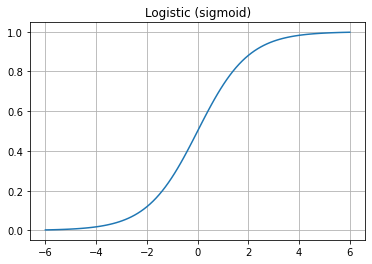

In [3]:
def logistic(x): return 1 / (1 + np.exp(-x))

x = np.linspace(-6, 6, 100)
plt.plot(x, logistic(x))
plt.grid(True)
plt.title('Logistic (sigmoid)')

Logistic regression is a **discriminative model** since it focuses only on the posterior probability of each class $p(C_k|x)$. It only requires to estimate the $P$ weights of the $\boldsymbol{w}$ vector. Thus it should be favoured over LDA with many input features. In small dimension and balanced situations it would provide similar predictions than LDA.

However imbalanced group sizes cannot be explicitly controlled. It can be managed using a reweighting of the input samples.

In [4]:
logreg = lm.LogisticRegression(penalty='none').fit(X, y)
# This class implements regularized logistic regression.
# C is the Inverse of regularization strength.
# Large value => no regularization.

logreg.fit(X, y)
y_pred_logreg = logreg.predict(X)

errors =  y_pred_logreg != y
print("Nb errors=%i, error rate=%.2f" % (errors.sum(), errors.sum() / len(y_pred_logreg)))
print(logreg.coef_)

Nb errors=10, error rate=0.05
[[-5.15  5.57]]


### Exercise

Explore the ``Logistic Regression`` parameters and proposes a solution in cases of highly imbalanced training dataset $N_1 \gg N_0$  when we know that in reality both classes have the same probability $p(C_1) = p(C_0)$.

## Losses


### Negative log likelihood or cross-entropy

The **Loss function** for sample $i$ is the negative log of the probability:
$$
L(\boldsymbol{w, x_i}, y_i) = \begin{cases}
        -\log(p(1|w, \boldsymbol{x_i}))  & \text{if } y_i = 1
        \\
        -\log(1 - p(1|w, \boldsymbol{x_i})  & \text{if } y_i = 0
        \end{cases}
$$

For the whole dataset $\boldsymbol{X}, \boldsymbol{y} = \{\boldsymbol{x_i}, y_i\}$ the loss function to minimize $L(\boldsymbol{w, X, y})$ is the negative negative log likelihood (nll) that can be simplied using a 0/1 coding of the label in the case of binary classification:

\begin{align}
L(\boldsymbol{w, X, y}) &= -\log \mathcal{L}(\boldsymbol{w, X, y}) \\
&= -\log \Pi_i\{p(1|\boldsymbol{w}, \boldsymbol{x_i})^{y_i} (1 - p(1|\boldsymbol{w}, \boldsymbol{x_i})^{(1 - y_i)}\}\\
&=  \sum_i\{y_i \log p(1|\boldsymbol{w}, \boldsymbol{x_i}) + (1 - y_i) \log(1 - p(1|\boldsymbol{w}, \boldsymbol{x_i}))\},
\end{align}

This is known as the **cross-entropy** between the true label $y$ and the predicted probability $p$.

For the logistic regression case, we have:
$$
L(\boldsymbol{w, X, y}) = \sum_i\{y_i \boldsymbol{w \cdot x_i} - \log(1 + \exp(\boldsymbol{w \cdot x_i}))\}
$$

This is solved by numerical method using the gradient of the loss:
$$
\partial\frac{L(\boldsymbol{w, X, y})}{\partial\boldsymbol{w}} = \sum_i \boldsymbol{x_i} (y_i - p(1|\boldsymbol{w}, \boldsymbol{x_i}))
$$

See also [Scikit learn doc](https://scikit-learn.org/stable/modules/sgd.html#mathematical-formulation)

### Hinge loss or $\ell_1$ loss

TODO

## Overfitting

VC dimension (for Vapnik–Chervonenkis dimension) is a measure of the **capacity** (complexity, expressive power, richness, or flexibility) of a statistical classification algorithm, defined as the cardinality of the largest set of points that the algorithm can shatter.

Theorem: Linear classifier in $R^P$ have VC dimension of $P+1$. Hence in dimension two ($P=2$) any random partition of 3 points can be learned.

![In 2D we can shatter any three non-collinear points](images/vc_dimension_linear_2d.png)

## Regularization using penalization of coefficients

The penalties use in regression are also used in classification. The only difference is the loss function generally the negative log likelihood (cross-entropy) or the hinge loss. We will explore:


- Ridge (also called $\ell_2$) penalty: $\|\mathbf{w}\|_2^2$. It shrinks coefficients toward 0.
- Lasso (also called $\ell_1$) penalty: $\|\mathbf{w}\|_1$. It performs feature selection by setting some coefficients to 0.
- ElasticNet (also called $\ell_1\ell_2$) penalty: $\alpha \left(\rho~\|\mathbf{w}\|_1 + (1-\rho)~\|\mathbf{w}\|_2^2 \right)$. It performs selection of group of correlated features by setting some coefficients to 0.

In [5]:
# Dataset with some correlation
X, y = datasets.make_classification(n_samples=100, n_features=10,
                                          n_informative=5, n_redundant=3,
                                          n_classes=2, random_state=3, shuffle=False)

lr = lm.LogisticRegression(penalty='none').fit(X, y)

l2 = lm.LogisticRegression(penalty='l2', C=.1).fit(X, y)  # lambda = 1 / C!

# use solver 'saga' to handle L1 penalty
l1 = lm.LogisticRegression(penalty='l1', C=.1, solver='saga').fit(X, y)  # lambda = 1 / C!

l1l2 = lm.LogisticRegression(penalty='elasticnet',  C=.1, l1_ratio=0.5, solver='saga').fit(X, y)  # lambda = 1 / C!


pd.DataFrame(np.vstack((lr.coef_, l2.coef_, l1.coef_, l1l2.coef_)),
             index=['lr', 'l2', 'l1', 'l1l2'])

,0,1,2,3,4,5,6,7,8,9
lr,4.37e-02,1.14,-0.28,0.57,0.55,-0.03,0.17,0.37,-0.42,0.39
l2,-4.87e-02,0.52,-0.21,0.34,0.26,-0.05,0.14,0.27,-0.25,0.21
l1,0.00e+00,0.31,0.00,0.10,0.00,0.00,0.00,0.26,0.00,0.00
l1l2,-7.08e-03,0.41,-0.15,0.29,0.12,0.00,0.00,0.20,-0.10,0.06


## Ridge Fisher's linear classification ($\ell_2$-regularization)

When the matrix $\boldsymbol{S_W}$ is not full rank or $P \gg N$, the The Fisher most discriminant projection estimate of the is not unique. This can be solved using a biased version of $\boldsymbol{S_W}$:
$$
\boldsymbol{S_W}^{Ridge} = \boldsymbol{S_W} + \lambda \boldsymbol{I}
$$

where $I$ is the $P \times P$ identity matrix. This leads to the regularized (ridge) estimator of the Fisher's linear discriminant analysis: 
$$
    \boldsymbol{w}^{Ridge} \propto (\boldsymbol{S_W} + \lambda \boldsymbol{I})^{-1}(\boldsymbol{\mu_1} - \boldsymbol{\mu_0})
$$

![The Ridge Fisher most discriminant projection](images/ridge_fisher_linear_disc.png)

Increasing $\lambda$ will:

- Shrinks the coefficients toward zero.
- The covariance will converge toward the diagonal matrix, reducing the contribution of the pairwise covariances.

## Ridge logistic regression ($\ell_2$-regularization)

The **objective function** to be minimized is now the combination of the logistic loss (negative log likelyhood) $-\log \mathcal{L}(\boldsymbol{w})$ with a penalty of the L2 norm of the weights vector. In the two-class case, using the 0/1 coding we obtain:

$$
\min_{\boldsymbol{w}}~\text{Logistic ridge}(\boldsymbol{w}) = -\log \mathcal{L}(\boldsymbol{w, X, y}) + \lambda~\|\boldsymbol{w}\|^2
$$

In [6]:
from sklearn import linear_model
lrl2 = linear_model.LogisticRegression(penalty='l2', C=.1)
# This class implements regularized logistic regression. C is the Inverse of regularization strength.
# Large value => no regularization.

lrl2.fit(X, y)
y_pred_l2 = lrl2.predict(X)
prob_pred_l2 = lrl2.predict_proba(X)

print("Probas of 5 first samples for class 0 and class 1:")
print(prob_pred_l2[:5, :])

print("Coef vector:")
print(lrl2.coef_)

# Retrieve proba from coef vector
probas = 1 / (1 + np.exp(- (np.dot(X, lrl2.coef_.T) + lrl2.intercept_))).ravel()
print("Diff", np.max(np.abs(prob_pred_l2[:, 1] - probas)))

errors =  y_pred_l2 != y
print("Nb errors=%i, error rate=%.2f" % (errors.sum(), errors.sum() / len(y)))

Probas of 5 first samples for class 0 and class 1:
[[0.89 0.11]
 [0.72 0.28]
 [0.73 0.27]
 [0.75 0.25]
 [0.48 0.52]]
Coef vector:
[[-0.05  0.52 -0.21  0.34  0.26 -0.05  0.14  0.27 -0.25  0.21]]
Diff 0.0
Nb errors=24, error rate=0.24


## Lasso logistic regression ($\ell_1$-regularization)

The **objective function** to be minimized is now the combination of the logistic loss $-\log \mathcal{L}(\boldsymbol{w})$ with a penalty of the L1 norm of the weights vector. In the two-class case, using the 0/1 coding we obtain:

$$
\min_{\boldsymbol{w}}~\text{Logistic Lasso}(w) = -\log \mathcal{L}(\boldsymbol{w, X, y}) + \lambda~\|\boldsymbol{w}\|_1
$$

In [7]:
from sklearn import linear_model
lrl1 = lm.LogisticRegression(penalty='l1', C=.1, solver='saga') # lambda = 1 / C!

# This class implements regularized logistic regression. C is the Inverse of regularization strength.
# Large value => no regularization.

lrl1.fit(X, y)
y_pred_lrl1 = lrl1.predict(X)

errors =  y_pred_lrl1 != y
print("Nb errors=%i, error rate=%.2f" % (errors.sum(), errors.sum() / len(y_pred_lrl1)))

print("Coef vector:")
print(lrl1.coef_)

Nb errors=27, error rate=0.27
Coef vector:
[[0.   0.31 0.   0.1  0.   0.   0.   0.26 0.   0.  ]]


## Ridge linear Support Vector Machine ($\ell_2$-regularization)

Support Vector Machine seek for separating hyperplane with maximum margin to enforce robustness against noise. Like logistic regression it is a **discriminative method** that only focuses of predictions.

Here we present the non separable case of Maximum Margin Classifiers with $\pm 1$ coding (ie.: $y_i \ \{-1, +1\}$). In the next figure the legend aply to samples of "dot" class. 

![Linear lar margin classifiers](images/svm.png)

Linear SVM for classification (also called SVM-C or SVC) minimizes:

$$
\begin{array}{lll}
\text{min}   & \text{Linear SVM}(\boldsymbol{w}) &= \text{penalty}(w) +  C~\text{Hinge loss}(w)\\
             & & = \|w\|_2^2 + C~\sum_i^N\xi_i\\
\text{with}  & \forall i & y_i (w \cdot \boldsymbol{x_i}) \geq 1 - \xi_i
\end{array}
$$

Here we introduced the slack variables: $\xi_i$, with $\xi_i = 0$ for points that are on or inside the correct margin boundary and $\xi_i = |y_i - (w \ cdot  \cdot \boldsymbol{x_i})|$ for other points. Thus:

1. If $y_i (w \cdot \boldsymbol{x_i}) \geq 1$ then the point lies outside the margin but on the correct side of the decision boundary. In this case $\xi_i=0$. The constraint is thus not active for this point. It does not contribute to the prediction.

2. If $1 > y_i (w \cdot \boldsymbol{x_i}) \geq 0$ then the point lies inside the margin and on the correct side of the decision boundary. In this case $0<\xi_i \leq 1$. The constraint is active for this point. It does contribute to the prediction as a support vector.

3. If $0 <  y_i (w \cdot \boldsymbol{x_i})$) then the point is on the wrong side of the decision boundary (missclassification). In this case $0<\xi_i > 1$. The constraint is active for this point. It does contribute to the prediction as a support vector.

This loss is called the hinge loss, defined as:

$$
\max(0, 1 - y_i~ (w \cdot \boldsymbol{x_i}))
$$

So linear SVM is closed to Ridge logistic regression, using the hinge loss instead of the logistic loss. Both will provide very similar predictions.

In [8]:
from sklearn import svm

svmlin = svm.LinearSVC(C=.1)
# Remark: by default LinearSVC uses squared_hinge as loss
svmlin.fit(X, y)
y_pred_svmlin = svmlin.predict(X)

errors =  y_pred_svmlin != y
print("Nb errors=%i, error rate=%.2f" % (errors.sum(), errors.sum() / len(y_pred_svmlin)))
print("Coef vector:")
print(svmlin.coef_)

Nb errors=20, error rate=0.20
Coef vector:
[[-0.    0.32 -0.09  0.17  0.16 -0.01  0.06  0.13 -0.16  0.13]]


## Lasso linear Support Vector Machine ($\ell_1$-regularization)

Linear SVM for classification (also called SVM-C or SVC) with l1-regularization

$$
\begin{array}{lll}
\text{min}   & F_{\text{Lasso linear SVM}}(w) &= ||w||_1 + C~\sum_i^N\xi_i\\
\text{with}  & \forall i & y_i (w \cdot \boldsymbol{x_i}) \geq 1 - \xi_i
\end{array}
$$

In [9]:
from sklearn import svm

svmlinl1 = svm.LinearSVC(penalty='l1', dual=False)
# Remark: by default LinearSVC uses squared_hinge as loss

svmlinl1.fit(X, y)
y_pred_svmlinl1 = svmlinl1.predict(X)

errors =  y_pred_svmlinl1 != y
print("Nb errors=%i, error rate=%.2f" % (errors.sum(), errors.sum() / len(y_pred_svmlinl1)))
print("Coef vector:")
print(svmlinl1.coef_)

Nb errors=20, error rate=0.20
Coef vector:
[[-0.01  0.37 -0.12  0.24  0.17  0.    0.    0.1  -0.16  0.13]]


## Exercise

Compare predictions of Logistic regression (LR) and their SVM counterparts, ie.: L2 LR vs L2 SVM and L1 LR vs L1 SVM

- Compute the correlation between pairs of weights vectors.

- Compare the predictions of two classifiers using their decision function:

    * Give the equation of the decision function for a linear classifier, assuming that their is no intercept.
    * Compute the correlation decision function.
    * Plot the pairwise decision function of the classifiers.

- Conclude on the differences between Linear SVM and logistic regression.

## Elastic-net classification ($\ell_1\ell_2$-regularization)

The **objective function** to be minimized is now the combination of the logistic loss $\log L(\boldsymbol{w})$ or the hinge loss with combination of L1 and L2 penalties. In the two-class case, using the 0/1 coding we obtain:

\begin{align}
\min~\text{Logistic enet}(\boldsymbol{w}) &= -\log \mathcal{L}(\boldsymbol{w, X, y}) + \alpha~\left(\rho~\|\boldsymbol{w}\|_1 + (1-\rho)~\|\boldsymbol{w}\|_2^2 \right)\\
\min~\text{Hinge enet}(\boldsymbol{w}) &= \text{Hinge loss}(\boldsymbol{w}) + \alpha~\left(\rho~\|\boldsymbol{w}\|_1 + (1-\rho)~\|\boldsymbol{w}\|_2^2 \right)
\end{align}

Hinge loss and logistic loss provide almost the same predictions.
Confusion matrix
Decision_function log x hinge losses:


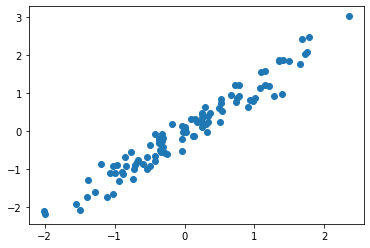

In [10]:
# Use SGD solver
enetlog = lm.SGDClassifier(loss="log", penalty="elasticnet",
                            alpha=0.1, l1_ratio=0.5, random_state=42)
enetlog.fit(X, y)

# Or saga solver:
# enetloglike = lm.LogisticRegression(penalty='elasticnet',
#                                    C=.1, l1_ratio=0.5, solver='saga')

enethinge = lm.SGDClassifier(loss="hinge", penalty="elasticnet",
                            alpha=0.1, l1_ratio=0.5, random_state=42)
enethinge.fit(X, y)

print("Hinge loss and logistic loss provide almost the same predictions.")
print("Confusion matrix")
metrics.confusion_matrix(enetlog.predict(X), enethinge.predict(X))

print("Decision_function log x hinge losses:")
_ = plt.plot(enetlog.decision_function(X),
             enethinge.decision_function(X), "o")

## Classification performance evaluation metrics

source: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

Imagine a study evaluating a new test that screens people for a disease. Each person taking the test either has or does not have the disease. The test outcome can be positive (classifying the person as having the disease) or negative (classifying the person as not having the disease). The test results for each subject may or may not match the subject's actual status. In that setting:

- True positive (TP): Sick people correctly identified as sick

- False positive (FP): Healthy people incorrectly identified as sick

- True negative (TN): Healthy people correctly identified as healthy

- False negative (FN): Sick people incorrectly identified as healthy

- **Accuracy** (ACC):

    ACC = (TP + TN) / (TP + FP + FN + TN)


- **Sensitivity** (SEN) or **recall** of the positive class or true positive rate (TPR) or hit rate:

    SEN = TP / P = TP / (TP+FN)


- **Specificity** (SPC) or **recall** of the negative class or true negative rate:

    SPC = TN / N = TN / (TN+FP) 


- **Precision** or positive predictive value (PPV):

    PPV = TP / (TP + FP)


- **Balanced accuracy** (bACC):is a useful performance measure is the balanced accuracy which avoids inflated performance estimates on imbalanced datasets (Brodersen, et al. (2010). "The balanced accuracy and its posterior distribution"). It is defined as the arithmetic mean of sensitivity and specificity, or the average accuracy obtained on either class:

    bACC = 1/2 * (SEN + SPC) 

- F1 Score (or F-score) which is a weighted average of precision and recall are usefull to deal with imballaced datasets
    
The four outcomes can be formulated in a 2×2 contingency table or confusion matrix https://en.wikipedia.org/wiki/Sensitivity_and_specificity

For more precision see: http://scikit-learn.org/stable/modules/model_evaluation.html

In [11]:
from sklearn import metrics
y_pred = [0, 1, 0, 0]
y_true = [0, 1, 0, 1]

metrics.accuracy_score(y_true, y_pred)

# The overall precision an recall
metrics.precision_score(y_true, y_pred)
metrics.recall_score(y_true, y_pred)

# Recalls on individual classes: SEN & SPC
recalls = metrics.recall_score(y_true, y_pred, average=None)
recalls[0] # is the recall of class 0: specificity
recalls[1] # is the recall of class 1: sensitivity

# Balanced accuracy
b_acc = recalls.mean()

# The overall precision an recall on each individual class
p, r, f, s = metrics.precision_recall_fscore_support(y_true, y_pred)

### Significance of classification rate

P-value associated to classification rate. Compared the number of correct classifications (=accuracy $\times N$) to the null hypothesis of Binomial distribution of parameters $p$ (typically 50% of chance level) and $N$ (Number of observations).

Is 65% of accuracy a significant prediction rate among 70 observations?

Since this is an exact, **two-sided** test of the null hypothesis, the p-value can be divided by 2 since we test that the accuracy is superior to the chance level.

In [12]:
import scipy.stats

acc, N = 0.65, 70
pval = scipy.stats.binom_test(x=int(acc * N), n=N, p=0.5) / 2
print(pval)

0.01123144774625465


### Area Under Curve (AUC) of Receiver operating characteristic (ROC)

Some classifier may have found a good discriminative projection $w$. However if the threshold to decide the final predicted class is poorly adjusted, the performances will highlight an high specificity and a low sensitivity or the contrary.

In this case it is recommended to use the AUC of a ROC analysis which basically provide a measure of overlap of the two classes when points are projected on the discriminative axis. For more detail on ROC and AUC see:https://en.wikipedia.org/wiki/Receiver_operating_characteristic.

In [13]:
score_pred = np.array([.1 ,.2, .3, .4, .5, .6, .7, .8])
y_true = np.array([0, 0, 0, 0, 1, 1, 1, 1])
thres = .9
y_pred = (score_pred > thres).astype(int)

print("With a threshold of %.2f, the rule always predict 0. Predictions:" % thres)
print(y_pred)
metrics.accuracy_score(y_true, y_pred)

# The overall precision an recall on each individual class
r = metrics.recall_score(y_true, y_pred, average=None)
print("Recalls on individual classes are:", r, "ie, 100% of specificity, 0% of sensitivity")

# However AUC=1 indicating a perfect separation of the two classes
auc = metrics.roc_auc_score(y_true, score_pred)
print("But the AUC of %.2f demonstrate a good classes separation." % auc)

With a threshold of 0.90, the rule always predict 0. Predictions:
[0 0 0 0 0 0 0 0]
Recalls on individual classes are: [1. 0.] ie, 100% of specificity, 0% of sensitivity
But the AUC of 1.00 demonstrate a good classes separation.


## Imbalanced classes

Learning with discriminative (logistic regression, SVM) methods is generally based on minimizing the misclassification of training samples, which may be unsuitable for imbalanced datasets where the recognition might be biased in favor of
the most numerous class. This problem can be addressed with a generative approach, which typically requires
more parameters to be determined leading to reduced performances in high dimension.

Dealing with imbalanced class may be addressed by three main ways (see Japkowicz and Stephen (2002) for a review), resampling, reweighting and one class learning.

In **sampling strategies**, either the minority class is oversampled or majority class is undersampled or some combination of the two is deployed. Undersampling (Zhang and Mani, 2003) the majority class would lead to a poor usage of the left-out samples. Sometime one cannot afford such strategy since we are also facing a small sample size problem even for the majority class.
Informed oversampling, which goes beyond a trivial duplication of minority class samples, requires the estimation of class conditional distributions in order to generate synthetic samples. Here generative models are required. An alternative, proposed in (Chawla et al., 2002) generate samples along the line segments joining any/all of the k minority class nearest neighbors. Such procedure blindly generalizes the minority area without regard to the majority class, which may be particularly problematic with high-dimensional and potentially skewed class distribution. 

**Reweighting**, also called cost-sensitive learning, works at an algorithmic level by adjusting the costs of the various classes to counter the class imbalance. Such reweighting can be implemented within SVM (Chang and Lin, 2001) or logistic regression (Friedman et al., 2010) classifiers. Most classifiers of Scikit learn offer such reweighting possibilities. 

The ``class_weight`` parameter can be positioned into the ``"balanced"`` mode which uses the values of $y$ to automatically adjust weights inversely proportional to class frequencies in the input data as $N / (2 N_k)$.

In [14]:
# dataset
X, y = datasets.make_classification(n_samples=500,
                           n_features=5,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=1,
                           shuffle=False)

print(*["#samples of class %i = %i;" % (lev, np.sum(y == lev)) for lev in np.unique(y)])

print('# No Reweighting balanced dataset')
lr_inter = linear_model.LogisticRegression(C=1)
lr_inter.fit(X, y)
p, r, f, s = metrics.precision_recall_fscore_support(y, lr_inter.predict(X))
print("SPC: %.3f; SEN: %.3f" % tuple(r))
print('# => The predictions are balanced in sensitivity and specificity\n')

# Create imbalanced dataset, by subsampling sample of class 0: keep only 10% of
# class 0's samples and all class 1's samples.
n0 = int(np.rint(np.sum(y == 0) / 20))
subsample_idx = np.concatenate((np.where(y == 0)[0][:n0], np.where(y == 1)[0]))
Ximb = X[subsample_idx, :]
yimb = y[subsample_idx]
print(*["#samples of class %i = %i;" % (lev, np.sum(yimb == lev)) for lev in 
        np.unique(yimb)])

print('# No Reweighting on imbalanced dataset')
lr_inter = linear_model.LogisticRegression(C=1)
lr_inter.fit(Ximb, yimb)
p, r, f, s = metrics.precision_recall_fscore_support(yimb, lr_inter.predict(Ximb))
print("SPC: %.3f; SEN: %.3f" % tuple(r))
print('# => Sensitivity >> specificity\n')

print('# Reweighting on imbalanced dataset')
lr_inter_reweight = linear_model.LogisticRegression(C=1, class_weight="balanced")
lr_inter_reweight.fit(Ximb, yimb)
p, r, f, s = metrics.precision_recall_fscore_support(yimb, 
                                                     lr_inter_reweight.predict(Ximb))
print("SPC: %.3f; SEN: %.3f" % tuple(r))
print('# => The predictions are balanced in sensitivity and specificity\n')

#samples of class 0 = 250; #samples of class 1 = 250;
# No Reweighting balanced dataset
SPC: 0.940; SEN: 0.928
# => The predictions are balanced in sensitivity and specificity

#samples of class 0 = 12; #samples of class 1 = 250;
# No Reweighting on imbalanced dataset
SPC: 0.750; SEN: 0.996
# => Sensitivity >> specificity

# Reweighting on imbalanced dataset
SPC: 1.000; SEN: 0.980
# => The predictions are balanced in sensitivity and specificity



## Exercise

### Fisher linear discriminant rule

Write a class ``FisherLinearDiscriminant`` that implements the Fisher's linear discriminant analysis. This class must be compliant with the scikit-learn API by providing two methods: 
- ``fit(X, y)`` which fits the model and returns the object itself;
- ``predict(X)`` which returns a vector of the predicted values.
Apply the object on the dataset presented for the LDA.